<a href="https://colab.research.google.com/github/mousam1995/Climate-Geospatial-Analysis-on-Python-with-Xarray/blob/main/Climate_Geospatial_Analysis_on_Python_with_Xarray_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load and Open NetCDF Data 
import xarray as xr
data_amazon=xr.open_dataset('/content/data (1).nc')

In [ ]:
data_amazon

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, expver: 2, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 ...
    skt        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
# Using nearest method to find out data related to multiple latitude and longitude
data_amazon.sel(latitude=[-32,-19],longitude=[-53,-67],method='nearest')

<xarray.Dataset>
Dimensions:    (longitude: 2, latitude: 2, expver: 2, time: 500)
Coordinates:
  * longitude  (longitude) float32 -53.0 -67.0
  * latitude   (latitude) float32 -16.0 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 ...
    skt        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
#For a plcae where longitude is less than -72 and latitude greater than -20

QUERY=data_amazon.longitude<-72
QUERY=QUERY & (data_amazon.latitude>-20)
data_amazon.where(QUERY,drop=True)

<xarray.Dataset>
Dimensions:    (time: 500, expver: 2, latitude: 89, longitude: 40)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -72.75 -72.5 -72.25
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 0.0 0.0 ... 2.599 0.0
    skt        (time, expver, latitude, longitude) float32 300.7 300.6 ... 290.8
    tp         (time, expver, latitude, longitude) float32 0.0004338 ... 0.0
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
data_amazon = xr.open_dataset('/content/data (1).nc').sel(expver=1)  #taking expver=1

(array([1.180000e+02, 3.424000e+03, 3.899800e+04, 1.086510e+05,
        1.537960e+05, 3.378610e+05, 1.026602e+06, 4.416252e+06,
        2.071530e+05, 8.690000e+02]),
 array([266.844  , 271.1717 , 275.49936, 279.82706, 284.15472, 288.48242,
        292.81012, 297.1378 , 301.46548, 305.79315, 310.12085],
       dtype=float32),
 <a list of 10 Patch objects>)

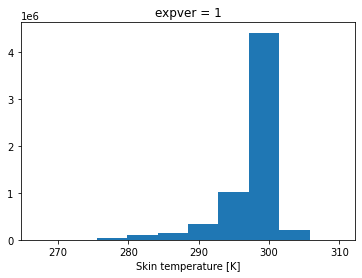

In [ ]:
#histogram based on temp skt
data_amazon.skt.plot()

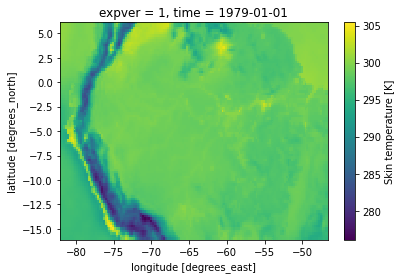

In [ ]:
data_amazon.isel(time=0).skt.plot()   #3d Visualization of temp data

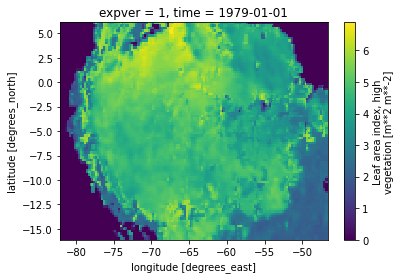

In [ ]:
data_amazon.isel(time=0).lai_hv.plot()   #3d visualization of vegetation data

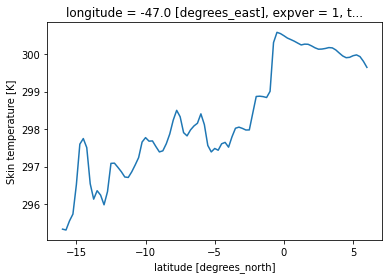

In [ ]:
#at time=0 (1979-01-01) temp is changing according to nearest longitude of -47
data_amazon.isel(time=0).sel(longitude=-47,method='nearest').skt.plot()

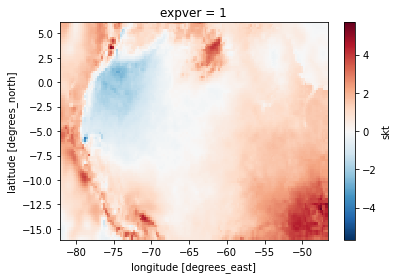

In [ ]:
# temp change from 1985-01-01 to 2019-01-01 
temp_change=(data_amazon.skt.sel(time='2019-01-01')-data_amazon.skt.sel(time='1985-01-01'))
temp_change.plot()

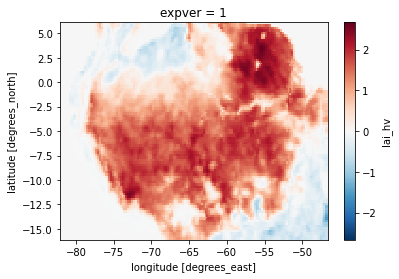

In [ ]:
# now seasonal change using vegetation Data_variables(lai_hv)

seasonal_change=(data_amazon.lai_hv.sel(time='2019-09-01')-data_amazon.lai_hv.sel(time='2019-01-01'))
seasonal_change.plot()

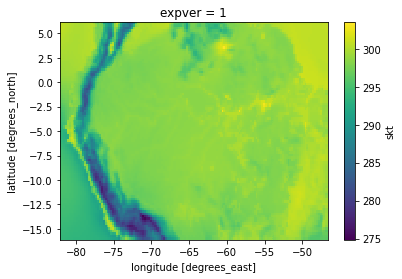

In [ ]:
# we can calculate mean temp over dimensions latitude and longitude. so graph will be 3d visualisation 
#over latitude,longitude and skt(surface temp), and time will be out
mean_temp=data_amazon.skt.mean(dim='time')
mean_temp.plot()

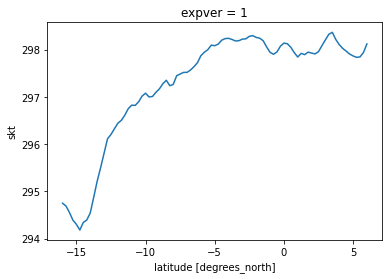

In [ ]:
#here we are plotting surface temp(skt) vs latitude
#and time and longitude are out
data_amazon.skt.mean(dim=['time','longitude']).plot()

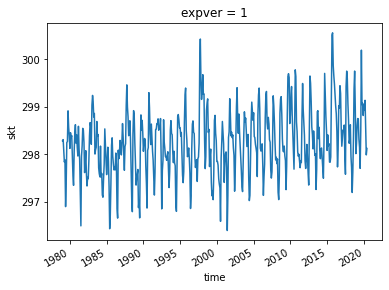

In [ ]:
#plotting surface temperature(skt) vs time(year)
data_amazon.skt.median(dim=['latitude','longitude']).plot()

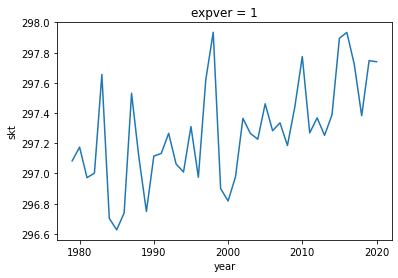

In [ ]:
#we will be using groupby function to find out annual temp mean
(data_amazon.groupby(data_amazon.time.dt.year)
    .mean(dim=['time','latitude','longitude']).skt.plot())

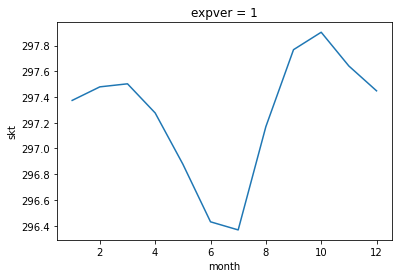

In [ ]:
#for month wise data
(data_amazon.groupby(data_amazon.time.dt.month)
    .mean(dim=['time','latitude','longitude']).skt.plot())

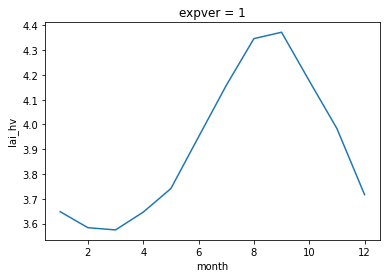

In [ ]:
#now vegetation index(lai_hv) wrt month
(data_amazon.groupby(data_amazon.time.dt.month)
    .mean(dim=['time','latitude','longitude']).lai_hv.plot())

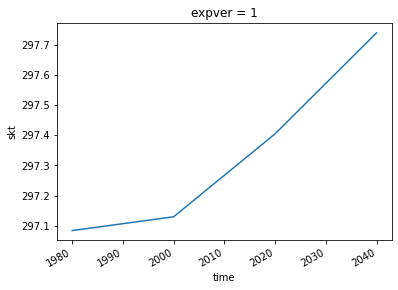

In [ ]:
#now for temp change over a 20 yrs time span
(data_amazon.resample({'time':'20y'}).mean(dim=['time','latitude','longitude']).skt.plot())

In [ ]:
#in this portion we will be merging and concatenate dataset and create new dimensions and variables


In [ ]:
dmm=data_amazon.time.dt.year    #over only time dimensions
dmm

<xarray.DataArray 'year' (time: 500)>
array([1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979,
       1979, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
       1980, 1980, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981,
       1981, 1981, 1981, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982,
       1982, 1982, 1982, 1982, 1983, 1983, 1983, 1983, 1983, 1983, 1983,
       1983, 1983, 1983, 1983, 1983, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1985, 1985, 1985, 1985, 1985,
       1985, 1985, 1985, 1985, 1985, 1985, 1985, 1986, 1986, 1986, 1986,
       1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1987, 1987, 1987,
       1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1988, 1988,
       1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1989,
       1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989,
       1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
       1990, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
       1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
       1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993,
       1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994, 1994, 1994, 1994,
       1994, 1994, 1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995,
       1995, 1995, 1995, 1995, 1995, 1995, 1996, 1996, 1996, 1996, 1996,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1997, 1997, 1997, 1997,
...
       2002, 2002, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
       2003, 2003, 2003, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2004, 2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
       2005, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006,
       2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007,
       2007, 2007, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009,
       2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020])
Coordinates:
    expver   int32 1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01

In [ ]:
data_1=data_amazon.merge(dmm)
data_1

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    year       (time) int64 1979 1979 1979 1979 1979 ... 2020 2020 2020 2020
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
#creating new data variable cubed distance
dmm=data_amazon.longitude**3+data_amazon.latitude**3
dmm.name='cubed_distance'
data_2=data_amazon.merge(dmm)
data_2

<xarray.Dataset>
Dimensions:         (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude       (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude        (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver          int32 1
  * time            (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv          (time, latitude, longitude) float32 ...
    skt             (time, latitude, longitude) float32 ...
    tp              (time, latitude, longitude) float32 ...
    cubed_distance  (longitude, latitude) float32 -5.512e+05 ... -1.063e+05
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
#let's merge data_1 and data_2 
data_3=data_1.merge(data_2)
data_3 

<xarray.Dataset>
Dimensions:         (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude       (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude        (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver          int32 1
  * time            (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv          (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan
    skt             (time, latitude, longitude) float32 300.7 300.6 ... nan nan
    tp              (time, latitude, longitude) float32 0.0004338 ... nan
    year            (time) int64 1979 1979 1979 1979 ... 2020 2020 2020 2020
    cubed_distance  (longitude, latitude) float32 -5.512e+05 ... -1.063e+05
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
#now we will be creating new Dimension mousam power
ds_square_root=data_3**(1/2)
ds_cube_root=data_3**(1/3)
data_4=xr.concat([data_3,ds_square_root,ds_cube_root],'mousam_power')
data_4 

<xarray.Dataset>
Dimensions:         (longitude: 142, latitude: 89, time: 500, mousam_power: 3)
Coordinates:
  * longitude       (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude        (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver          int32 1
  * time            (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Dimensions without coordinates: mousam_power
Data variables:
    lai_hv          (mousam_power, time, latitude, longitude) float32 0.0 ......
    skt             (mousam_power, time, latitude, longitude) float32 300.7 ....
    tp              (mousam_power, time, latitude, longitude) float32 0.00043...
    year            (mousam_power, time) float64 1.979e+03 1.979e+03 ... 12.64
    cubed_distance  (mousam_power, longitude, latitude) float32 -5.512e+05 .....
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

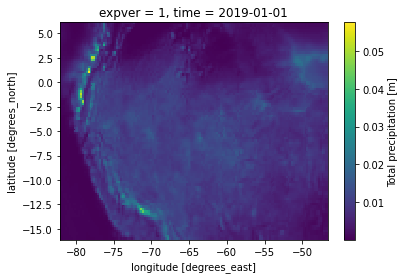

In [ ]:
data_amazon.sel(time='2019-01-01').tp.plot()   #total precipitation

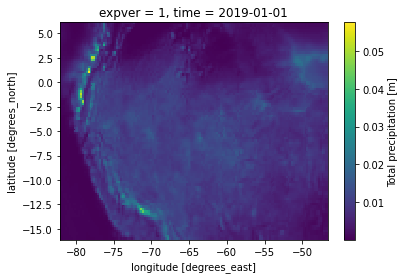

In [ ]:
#total precipitation for new data
data_4.sel(mousam_power=0,time='2019-01-01').tp.plot()

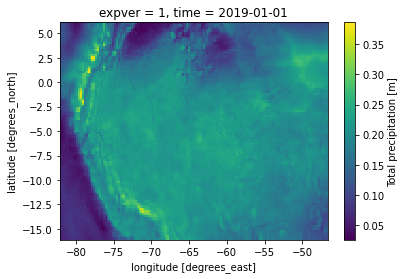

In [ ]:
#total precipitation for new data but when mousam_power=2
data_4.sel(mousam_power=2,time='2019-01-01').tp.plot()

In [ ]:

df=data_amazon.to_dataframe()
df

expver    lai_hv         skt        tp
longitude latitude time                                              
-82.00     6.0     1979-01-01       1  0.000000  300.670105  0.000434
                   1979-02-01       1  0.000000  300.829926  0.001139
                   1979-03-01       1  0.000000  301.014832  0.005566
                   1979-04-01       1  0.000000  301.105957  0.011398
                   1979-05-01       1  0.000000  300.924347  0.009486
...                               ...       ...         ...       ...
-46.75    -16.0    2020-04-01       1  1.905231  295.797791  0.004340
                   2020-05-01       1  1.735271  293.425049  0.001070
                   2020-06-01       1  1.578286  293.098816  0.000035
                   2020-07-01       1       NaN         NaN       NaN
                   2020-08-01       1       NaN         NaN       NaN

[6319000 rows x 4 columns]

In [ ]:
# for time but only month
da=data_amazon.time.dt.month
da.to_dataframe()


,expver,month
time,,
1979-01-01,1,1
1979-02-01,1,2
1979-03-01,1,3
1979-04-01,1,4
1979-05-01,1,5
...,...,...
2020-04-01,1,4
2020-05-01,1,5
2020-06-01,1,6


In [ ]:
#we can do this in pandas to
da.to_series()

time
1979-01-01    1
1979-02-01    2
1979-03-01    3
1979-04-01    4
1979-05-01    5
             ..
2020-04-01    4
2020-05-01    5
2020-06-01    6
2020-07-01    7
2020-08-01    8
Name: month, Length: 500, dtype: int64

In [ ]:
# we can retrieve xarray dataset
xr.Dataset.from_dataframe(df) #but some metadata will be lost

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float64 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float64 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    expver     (longitude, latitude, time) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    lai_hv     (longitude, latitude, time) float32 0.0 0.0 0.0 ... 1.578 nan nan
    skt        (longitude, latitude, time) float32 300.7 300.8 301.0 ... nan nan
    tp         (longitude, latitude, time) float32 0.0004338 0.001139 ... nan

In [ ]:
#same way we can retrieve xarray datasets from pandas as well
xr.DataArray.from_series(df.skt) #lets test for skt

<xarray.DataArray 'skt' (longitude: 142, latitude: 89, time: 500)>
array([[[300.6701 , 300.82993, 301.01483, ..., 300.857  ,       nan,
               nan],
        [300.647  , 300.77512, 300.85104, ..., 300.8352 ,       nan,
               nan],
        [300.6351 , 300.7619 , 300.71237, ..., 300.8121 ,       nan,
               nan],
        ...,
        [295.848  , 296.73026, 297.36688, ..., 293.81006,       nan,
               nan],
        [295.81894, 296.68536, 297.25528, ..., 293.8061 ,       nan,
               nan],
        [295.77206, 296.6583 , 297.15753, ..., 293.6714 ,       nan,
               nan]],

       [[300.60406, 300.71503, 300.84116, ..., 300.79227,       nan,
               nan],
        [300.58426, 300.63312, 300.65756, ..., 300.80417,       nan,
               nan],
        [300.56906, 300.57236, 300.47595, ..., 300.7784 ,       nan,
               nan],
...
        [295.55347, 296.13065, 296.93893, ..., 293.72025,       nan,
               nan],
        [295.31308, 295.9061 , 296.6028 , ..., 293.30817,       nan,
               nan],
        [295.3362 , 296.01376, 296.56384, ..., 293.1675 ,       nan,
               nan]],

       [[299.58643, 299.99585, 300.03284, ..., 301.48172,       nan,
               nan],
        [299.75018, 300.15436, 300.1418 , ..., 301.52466,       nan,
               nan],
        [299.8968 , 300.27322, 300.2303 , ..., 301.59332,       nan,
               nan],
        ...,
        [295.77997, 296.26733, 297.01688, ..., 293.55383,       nan,
               nan],
        [295.47687, 295.99988, 296.6596 , ..., 293.22165,       nan,
               nan],
        [295.1995 , 295.83215, 296.38223, ..., 293.09882,       nan,
               nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float64 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01

**Thank You................................**